In [37]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [38]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [39]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [40]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [41]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

C:\Users\sophi\AppData\Local\Temp\ipykernel_5112\4196587217.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [42]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [43]:
# Save references to each table
station=Base.classes.station
measurement=Base.classes.measurement

In [44]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [45]:
# Find the most recent date in the data set.
most_recent_date=session.query(measurement.date).order_by(measurement.date.desc()).first()
most_recent_date

('2017-08-23',)

Text(0, 0.5, 'inches')

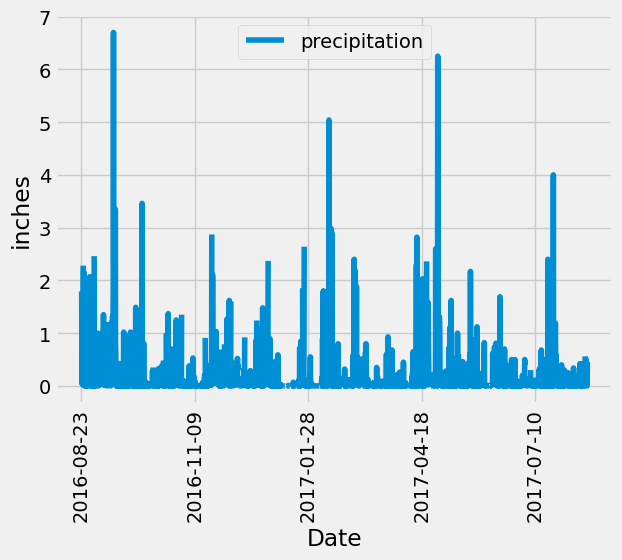

In [46]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year_date=dt.date(2017, 8, 23)-dt.timedelta(days=365)
last_year_date

# Perform a query to retrieve the data and precipitation scores
precipitation=session.query(measurement.date, measurement.prcp).filter(measurement.date >= last_year_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
precipitation_df = pd.DataFrame(precipitation, columns=['date', 'precipitation'])

# Sort the dataframe by date
precipitation_df.set_index('date', inplace=True)
precipitation_df = precipitation_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
precipitation_df.plot()
plt.xlabel('Date')
plt.xticks(rotation=90)
plt.ylabel('inches')

In [47]:
# Use Pandas to calculate the summary statistics for the precipitation data
precipitation_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [48]:
# Design a query to calculate the total number of stations in the dataset
total_stations=session.query(station).count()
total_stations

9

In [49]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(measurement.station,func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [50]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station_tempatures=session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
most_active_station_tempatures

[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

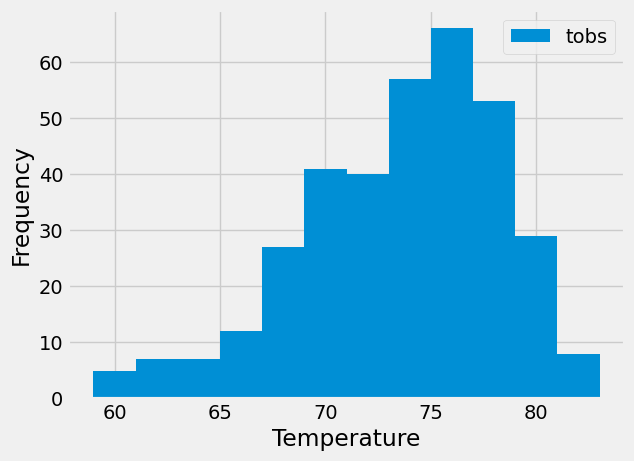

In [51]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station = session.query(measurement.date, measurement.tobs).filter(measurement.date >= last_year_date).filter(measurement.station == 'USC00519281').all()
df=pd.DataFrame(most_active_station)
df.plot(kind='hist', bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')

# Close Session

In [52]:
# Close Session
session.close()